# **Credit Card Default Risk Analysis**

Team Members:


1.   Y.Yaswitha Nandu - CS23I1037

1.   Deetya Ashish Mehta - CS23I1032
2.   Akshita Singh - CS23I1004




In [ ]:
import pandas as pd

# Direct URL to the Excel file from the UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

# Read the file directly into a DataFrame, using row 1 (0-indexed) as the header
df = pd.read_excel(url, header=1)

**Data Cleaning and Pre-processing**

In [ ]:
import pandas as pd
import numpy as np

# Convert ALL current columns to UPPERCASE to resolve case sensitivity issues
df.columns = df.columns.str.upper()

# Drop the ID column (if it exists after renaming/casing)
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)

# Rename columns to standard, clear names (Keys must be UPPERCASE now)
# This step handles the PAY_0 to PAY_1 change, SEX to GENDER, and standardizes casing.
new_column_names = {
    'LIMIT_BALANCE': 'LIMIT_BAL',  # Standardizing naming convention
    'SEX': 'GENDER',               # Renaming from original 'SEX'
    'MARRIAGE': 'MARITAL_STATUS',   # Renaming from original 'MARRIAGE'
    'PAY_0': 'PAY_1',              # Renaming September status for month consistency
    'DEFAULT PAYMENT NEXT MONTH': 'DEFAULT_NEXT_MONTH' # Catching original target name
}

df.rename(columns=new_column_names, inplace=True)

# --- 2. STANDARDIZING DEMOGRAPHIC CATEGORICAL VARIABLES ---

# --- GENDER (1=Male, 2=Female) ---
df['GENDER'] = df['GENDER'].map({1: 'MALE', 2: 'FEMALE'}).astype('category')

# --- MARITAL STATUS (1=Married, 2=Single, 3=Other/Divorced) ---
# Replace undocumented '0' code with '3' ('Other')
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].replace(0, 3)
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].map({
    1: 'MARRIED',
    2: 'SINGLE',
    3: 'OTHER'
}).astype('category')

# --- EDUCATION (1=Grad School, 2=University, 3=High School, 4=Other) ---
# Replace undocumented '0', '5', and '6' codes with '4' ('Other')
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)
df['EDUCATION'] = df['EDUCATION'].map({
    1: 'GRADUATE_SCHOOL',
    2: 'UNIVERSITY',
    3: 'HIGH_SCHOOL',
    4: 'OTHER'
}).astype('category')

# --- 3. CLEANING AND RE-ENCODING PAYMENT STATUS (PAY_x) ---

pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

pay_status_map = {
    -2: 'NO_CONSUMPTION',
    -1: 'PAID_DULY',
    0: 'REVOLVING_CREDIT_USED',
    1: 'DELAY_1_MONTH',
    2: 'DELAY_2_MONTHS',
    3: 'DELAY_3_MONTHS',
    4: 'DELAY_4_MONTHS',
    5: 'DELAY_5_MONTHS',
    6: 'DELAY_6_MONTHS',
    7: 'DELAY_7_MONTHS',
    8: 'DELAY_8+_MONTHS',
    9: 'DELAY_8+_MONTHS'
}

categorical_cols = df.select_dtypes(include=['category']).columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

print("One-Hot Encoding complete.")
print(df.head())
print(f"New DataFrame shape after encoding: {df_encoded.shape}")

# Target variable is 'DEFAULT_NEXT_MONTH'
X = df_encoded.drop('DEFAULT_NEXT_MONTH', axis=1)
y = df_encoded['DEFAULT_NEXT_MONTH']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


One-Hot Encoding complete.
   LIMIT_BAL  GENDER   EDUCATION MARITAL_STATUS  AGE  PAY_1  PAY_2  PAY_3  \
0      20000  FEMALE  UNIVERSITY        MARRIED   24      2      2     -1   
1     120000  FEMALE  UNIVERSITY         SINGLE   26     -1      2      0   
2      90000  FEMALE  UNIVERSITY         SINGLE   34      0      0      0   
3      50000  FEMALE  UNIVERSITY        MARRIED   37      0      0      0   
4      50000    MALE  UNIVERSITY        MARRIED   57     -1      0     -1   

   PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -1     -2  ...          0          0          0         0       689   
1      0      0  ...       3272       3455       3261         0      1000   
2      0      0  ...      14331      14948      15549      1518      1500   
3      0      0  ...      28314      28959      29547      2000      2019   
4      0      0  ...      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFA

**Exploratory Data Analysis**

/tmp/ipython-input-1893867498.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="DEFAULT_NEXT_MONTH",data=df,palette='coolwarm')


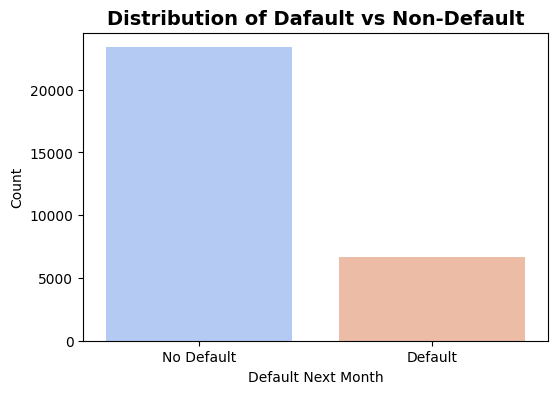

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="DEFAULT_NEXT_MONTH",data=df,palette='coolwarm')
plt.title("Distribution of Dafault vs Non-Default",fontsize=14,weight='bold')
plt.xlabel('Default Next Month')
plt.ylabel('Count')
plt.xticks([0,1],['No Default','Default'])
plt.show()

/tmp/ipython-input-1344412971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="GENDER",y='DEFAULT_NEXT_MONTH',data=df,palette='mako')


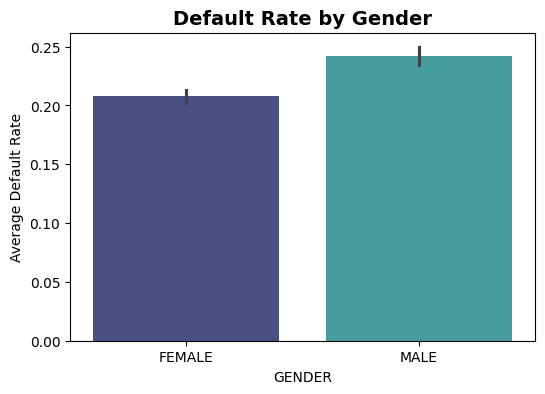

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x="GENDER",y='DEFAULT_NEXT_MONTH',data=df,palette='mako')
plt.title('Default Rate by Gender',fontsize=14,weight='bold')
plt.ylabel('Average Default Rate')
plt.show()

/tmp/ipython-input-1508414962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EDUCATION',y='DEFAULT_NEXT_MONTH',data=df,palette='crest')


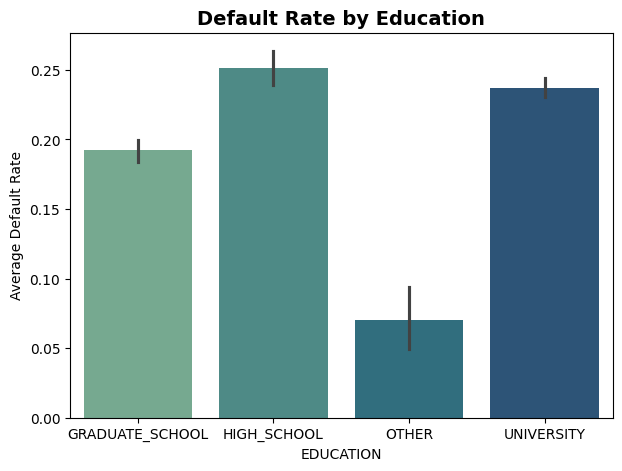

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='EDUCATION',y='DEFAULT_NEXT_MONTH',data=df,palette='crest')
plt.title('Default Rate by Education',fontsize=14,weight='bold')
plt.ylabel('Average Default Rate')
plt.show()

/tmp/ipython-input-1456867222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MARITAL_STATUS',y='DEFAULT_NEXT_MONTH',data=df,palette='viridis')


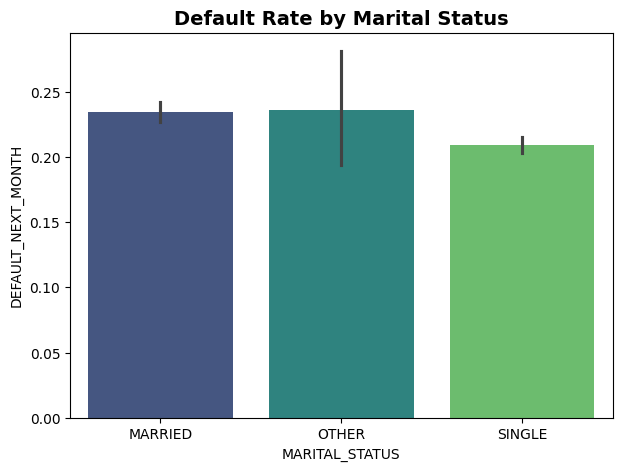

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='MARITAL_STATUS',y='DEFAULT_NEXT_MONTH',data=df,palette='viridis')
plt.title('Default Rate by Marital Status',fontsize=14,weight='bold')
plt.show()

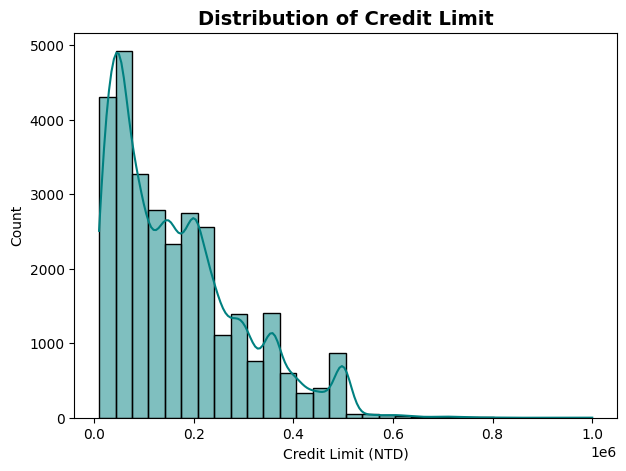

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df['LIMIT_BAL'],bins=30,kde=True,color='teal')
plt.title('Distribution of Credit Limit',fontsize=14,weight='bold')
plt.xlabel('Credit Limit (NTD)')
plt.show()

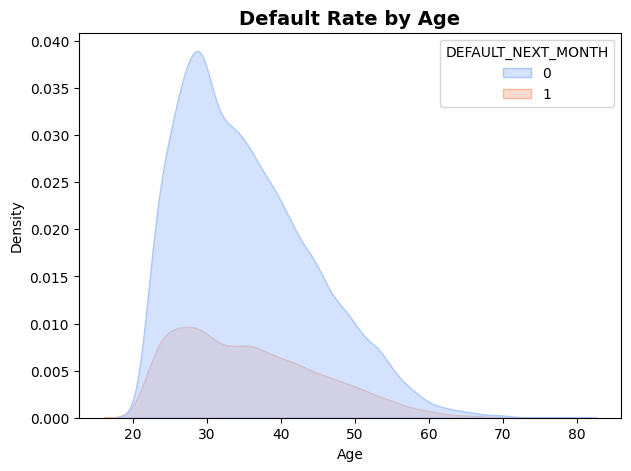

In [ ]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=df,x='AGE',hue='DEFAULT_NEXT_MONTH',fill=True,palette='coolwarm',alpha=0.5)
plt.title('Default Rate by Age',fontsize=14,weight='bold')
plt.xlabel('Age')
plt.show()

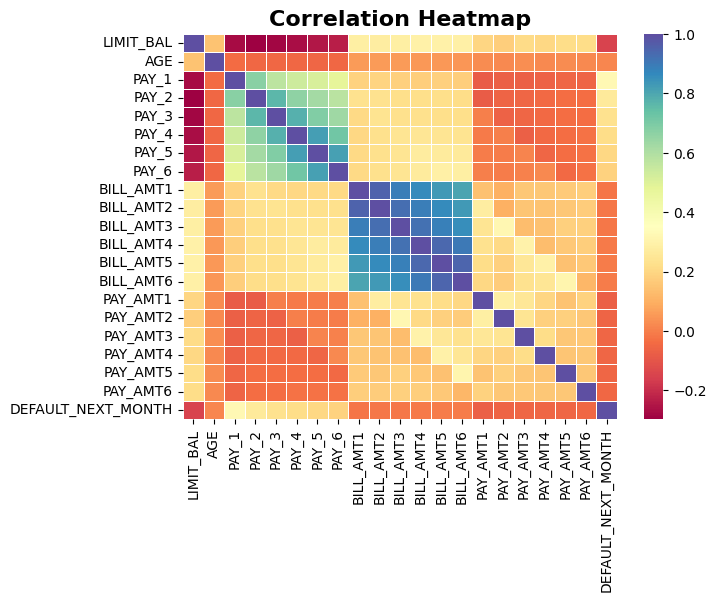

In [ ]:
plt.figure(figsize=(7,5))
corr=df.corr(numeric_only=True)
sns.heatmap(corr,cmap='Spectral',annot=False,linewidths=0.5)
plt.title('Correlation Heatmap',fontsize=16,weight='bold')
plt.show()

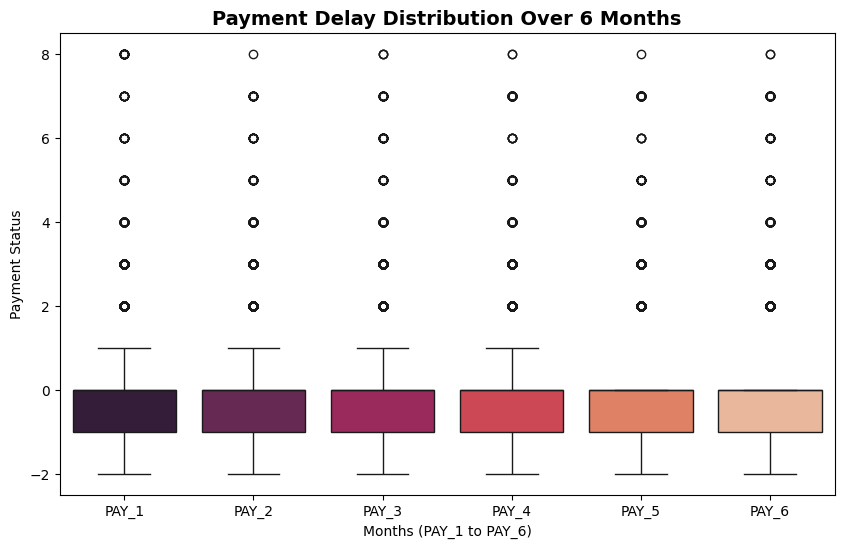

In [ ]:
pay_cols=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
plt.figure(figsize=(10,6))
sns.boxplot(data=df[pay_cols],palette='rocket')
plt.title('Payment Delay Distribution Over 6 Months',fontsize=14,weight='bold')
plt.xlabel('Months (PAY_1 to PAY_6)')
plt.ylabel('Payment Status')
plt.show()

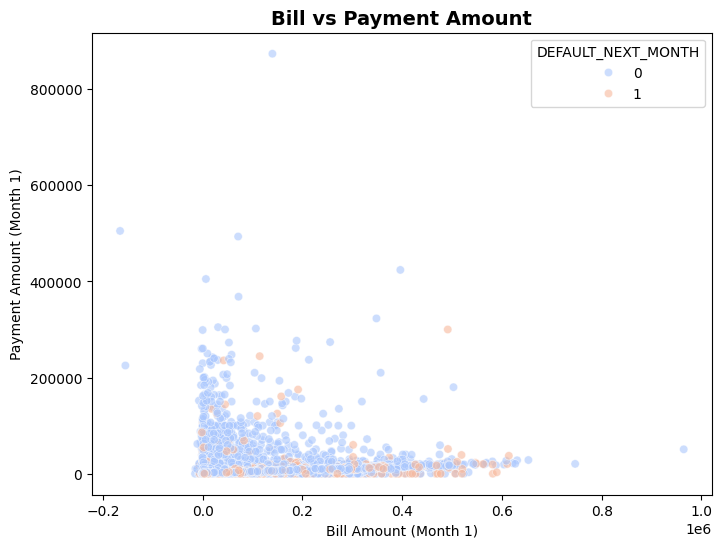

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BILL_AMT1',y='PAY_AMT1',hue='DEFAULT_NEXT_MONTH',data=df,palette='coolwarm',alpha=0.6)
plt.title('Bill vs Payment Amount',fontsize=14,weight='bold')
plt.xlabel('Bill Amount (Month 1)')
plt.ylabel('Payment Amount (Month 1)')
plt.show()

# Feature Engineering

In [ ]:
df['num_delayed_months']=(df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]>0).sum(axis=1)
df['max_delay']=df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].max(axis=1)
df['avg_delay']=df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis=1)

In [ ]:
for i in range(1,7):
  df[f'pay_ratio_{i}']=df[f'PAY_AMT{i}']/(df[f'BILL_AMT{i}']+1)

In [ ]:
df['bill_trend']=df['BILL_AMT6']-df['BILL_AMT1']
df['pay_trend']=df['PAY_AMT6']-df['PAY_AMT1']

In [ ]:
df['avg_bill_amt']=df[[f'BILL_AMT{i}' for i in range(1,7)]].mean(axis=1)
df['credit_utilization']=df['avg_bill_amt']/(df['LIMIT_BAL']+1)

In [ ]:
df['total_payment']=df[[f'PAY_AMT{i}' for i in range(1,7)]].sum(axis=1)
df['total_bill']=df[[f'BILL_AMT{i}' for i in range(1,7)]].sum(axis=1)
df['payment_to_bill_ratio']=df['total_payment']/(df['total_bill']+1)

In [ ]:
print(df.shape)
df.head()

(30000, 40)


,LIMIT_BAL,GENDER,EDUCATION,MARITAL_STATUS,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,pay_ratio_4,pay_ratio_5,pay_ratio_6,bill_trend,pay_trend,avg_bill_amt,credit_utilization,total_payment,total_bill,payment_to_bill_ratio
0,20000,FEMALE,UNIVERSITY,MARRIED,24,2,2,-1,-1,-2,...,0.000000,0.000000,0.000000,-3913,0,1284.000000,0.064197,689,7704,0.089422
1,120000,FEMALE,UNIVERSITY,SINGLE,26,-1,2,0,0,0,...,0.305530,0.000000,0.613121,579,2000,2846.166667,0.023718,5000,17077,0.292774
2,90000,FEMALE,UNIVERSITY,SINGLE,34,0,0,0,0,0,...,0.069774,0.066894,0.321543,-13690,3482,16942.166667,0.188244,11018,101653,0.108387
3,50000,FEMALE,UNIVERSITY,MARRIED,37,0,0,0,0,0,...,0.038849,0.036913,0.033843,-17443,-1000,38555.666667,0.771098,8388,231334,0.036259
4,50000,MALE,UNIVERSITY,MARRIED,57,-1,0,-1,0,0,...,0.429779,0.035985,0.035490,10514,-1321,18223.166667,0.364456,59049,109339,0.540049


In [ ]:
cols_to_drop=[
    'ID',
    'PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'
]
df.drop(columns=cols_to_drop,inplace=True,errors='ignore')
print('Shape after dropping the redundant columns:',df.shape)


Shape after dropping the redundant columns: (30000, 34)


In [ ]:
target_col='DEFAULT_NEXT_MONTH'
X=df.drop(columns=[target_col])
y=df[target_col]

print('Features shape:',X.shape,"Target shape:",y.shape)

Features shape: (30000, 33) Target shape: (30000,)


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Use the df_encoded DataFrame which contains the one-hot encoded categorical features
X=df_encoded.drop(columns=[target_col])
y=df_encoded[target_col]


num_cols=X.select_dtypes(include=['int64','float64']).columns.tolist()
scaler=StandardScaler()

# Check for and handle infinite values before scaling
# Replace infinite values with NaN and then fill NaN (e.g., with the mean or median)
X[num_cols] = X[num_cols].replace([np.inf, -np.inf], np.nan)

# Option 1: Fill with mean (requires imputation strategy)
# X[num_cols] = X[num_cols].fillna(X[num_cols].mean())

# Option 2: Drop rows with NaN (if only a few rows are affected)
# X = X.dropna(subset=num_cols) # Need to also drop corresponding rows from y if this option is chosen

# Option 3: Fill with median (alternative to mean)
X[num_cols] = X[num_cols].fillna(X[num_cols].median())


X[num_cols]=scaler.fit_transform(X[num_cols])


print("Scaled numnerical feature sample:")
print(X[num_cols].head())

Scaled numnerical feature sample:
   LIMIT_BAL       AGE     PAY_1     PAY_2     PAY_3     PAY_4     PAY_5  \
0  -1.136720 -1.246020  1.794564  1.782348 -0.696663 -0.666599 -1.530046   
1  -0.365981 -1.029047 -0.874991  1.782348  0.138865  0.188746  0.234917   
2  -0.597202 -0.161156  0.014861  0.111736  0.138865  0.188746  0.234917   
3  -0.905498  0.164303  0.014861  0.111736  0.138865  0.188746  0.234917   
4  -0.905498  2.334029 -0.874991  0.111736 -0.696663  0.188746  0.234917   

      PAY_6  BILL_AMT1  BILL_AMT2  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0 -1.486041  -0.642501  -0.647399  ... -0.296801 -0.308063 -0.314136   
1  1.992316  -0.659219  -0.666747  ... -0.240005 -0.244230 -0.314136   
2  0.253137  -0.298560  -0.493899  ... -0.240005 -0.244230 -0.248683   
3  0.253137  -0.057491  -0.013293  ... -0.228645 -0.237846 -0.244166   
4  0.253137  -0.578618  -0.611318  ...  0.271165  0.266434 -0.269039   

   PAY_AMT6  GENDER_MALE  EDUCATION_HIGH_SCHOOL  EDUCATION_OTHER  \
0 -0.293

In [ ]:
from sklearn.model_selection import train_test_split

# Ensure we are using the X and y derived from the encoded and scaled data
# The previous cell already prepared X and y, so we can directly use them here

X_train,X_test,y_train,y_test=train_test_split(
    X,y, # Use the X and y from the previous cell
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Training default rate: {y_train.mean():.4f}")
print(f"Testing default rate: {y_test.mean():.4f}")

X_train shape: (24000, 26)
X_test shape: (6000, 26)
Training default rate: 0.2212
Testing default rate: 0.2212


Model Training
1)Logistic Regression
2)XG Boost

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

# XGBoost
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    eval_metric='logloss' # Removed use_label_encoder as it's deprecated
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("✅ Both models trained successfully!")

✅ Both models trained successfully!


Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

evaluation = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
    "Logistic Regression": [
        accuracy_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr),
        roc_auc_score(y_test, y_proba_lr)
    ],
    "XGBoost": [
        accuracy_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_xgb),
        roc_auc_score(y_test, y_proba_xgb)
    ]
})

evaluation

,Metric,Logistic Regression,XGBoost
0,Accuracy,0.809000,0.818833
1,Precision,0.692964,0.668067
2,Recall,0.244913,0.359457
3,F1-Score,0.361915,0.467418
4,ROC-AUC,0.709913,0.779039


Model Optimization

Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define separate parameter grids for different penalties
param_grid_lr = [
    {
        'penalty': ['l1', 'l2'],
        'solver': ['saga'],
        'C': [0.01, 0.1, 1, 10],
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'C': [0.01, 0.1, 1, 10],
        'l1_ratio': [0, 0.5, 1]
    }
]

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=2000, random_state=42),
    param_grid_lr,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_lr.best_params_)
print("Best ROC-AUC:", grid_lr.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8],
    'subsample': [0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.7, 0.8, 0.9, 1],
    'gamma': [0, 0.1, 0.2, 0.3],
}

random_xgb = RandomizedSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'), # Removed use_label_encoder
    param_distributions=param_dist_xgb,
    scoring='roc_auc',
    n_iter=20,
    cv=5,
    n_jobs=-1,
    verbose=1
)
random_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost:", random_xgb.best_params_)
print("Best ROC-AUC:", random_xgb.best_score_)

Evaluation of optimized models


In [ ]:
best_lr = grid_lr.best_estimator_
best_xgb = random_xgb.best_estimator_

y_pred_lr_opt = best_lr.predict(X_test)
y_proba_lr_opt = best_lr.predict_proba(X_test)[:, 1]

y_pred_xgb_opt = best_xgb.predict(X_test)
y_proba_xgb_opt = best_xgb.predict_proba(X_test)[:, 1]

# Compare after tuning
from sklearn.metrics import roc_auc_score
print("Optimized LR ROC-AUC:", roc_auc_score(y_test, y_proba_lr_opt))
print("Optimized XGB ROC-AUC:", roc_auc_score(y_test, y_proba_xgb_opt))

Output

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib

# Predictions
y_pred_lr = best_lr.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:,1]
y_proba_xgb = best_xgb.predict_proba(X_test)[:,1]

# Classification Reports
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("LR - Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("XGB - Confusion Matrix")
plt.show()

# ROC Curve
plt.figure(figsize=(8,6))
RocCurveDisplay.from_predictions(y_test, y_proba_lr, name="Logistic Regression")
RocCurveDisplay.from_predictions(y_test, y_proba_xgb, name="XGBoost")
plt.title("ROC Curve Comparison")
plt.show()

# Precision Recall Curve
plt.figure(figsize=(8,6))
PrecisionRecallDisplay.from_predictions(y_test, y_proba_lr, name="LR")
PrecisionRecallDisplay.from_predictions(y_test, y_proba_xgb, name="XGB")
plt.title("Precision-Recall Curve")
plt.show()

# Feature Importance for XGB
xgb_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=xgb_importances.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features - XGB")
plt.show()

# Save Models for Dashboard
joblib.dump(best_lr, "optimized_lr_model.pkl")
joblib.dump(best_xgb, "optimized_xgb_model.pkl")
print("✅ Models saved successfully!")


In [ ]:
!pip install plotly pandas ipywidgets

In [ ]:
import joblib
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Configuration based on the error message ---

# The full list of features the model was trained on, derived from the error message.
MODEL_FEATURE_NAMES = [
    'LIMIT_BAL', 'AGE',
    'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'GENDER_MALE',
    'EDUCATION_HIGH_SCHOOL', 'EDUCATION_OTHER', 'EDUCATION_UNIVERSITY',
    'MARITAL_STATUS_OTHER', 'MARITAL_STATUS_SINGLE'
]

# Define the primary colors for Dark Mode
COLOR_LIGHT_BLUE = '#89c4f7'
COLOR_HEADER = '#b4d7f7'
COLOR_TEXT_LIGHT = '#e0e0e0'
COLOR_TEXT_SECONDARY = '#a0a0a0'
COLOR_BACKGROUND_DARK = '#1e1e1e' # Used by plotly_dark

# --- NEW: Define a common style for all widget labels ---
STYLE_CONFIG = {'description_width': '120px', 'description_color': COLOR_TEXT_LIGHT}

# Load the trained models
try:
    # NOTE: Assuming the model objects (best_lr, best_xgb) exist and are loaded.
    try:
        best_lr = joblib.load('optimized_lr_model.pkl')
        best_xgb = joblib.load('optimized_xgb_model.pkl')
        print("✓ Models loaded successfully!")
    except FileNotFoundError:
        # Fallback for environments without the files (to allow testing the dashboard logic)
        class DummyModel:
            def predict(self, X):
                return np.array([0])
            def predict_proba(self, X):
                return np.array([[0.8, 0.2]])
            @property
            def feature_importances_(self):
                return np.random.rand(len(MODEL_FEATURE_NAMES))
        best_lr = DummyModel()
        best_xgb = DummyModel()
        print("⚠ WARNING: Model files not found. Using dummy models for demonstration.")


except Exception as e:
    print(f"Error during model setup: {e}")

# Define feature names for importance plot (using the model's expected names)
FEATURE_NAMES = MODEL_FEATURE_NAMES

# Create widgets (UPDATED: Added style=STYLE_CONFIG to all input widgets)
model_dropdown = widgets.Dropdown(
    options=['Logistic Regression', 'XGBoost'],
    value='XGBoost',
    description='Model:',
    style=STYLE_CONFIG
)

# Feature input widgets
limit_bal = widgets.IntSlider(min=10000, max=1000000, step=10000, value=100000,
                             description='Credit Limit:', style=STYLE_CONFIG)
age = widgets.IntSlider(min=21, max=80, step=1, value=35,
                        description='Age:', style=STYLE_CONFIG)
sex = widgets.Dropdown(options=[('Male', 1), ('Female', 2)], value=1,
                       description='Sex:', style=STYLE_CONFIG)
education = widgets.Dropdown(options=[('Graduate', 1), ('University', 2), ('High School', 3), ('Others', 4)],
                             value=2, description='Education:', style=STYLE_CONFIG)
marriage = widgets.Dropdown(options=[('Married', 1), ('Single', 2), ('Others', 3)],
                            value=2, description='Marriage:', style=STYLE_CONFIG)

pay_0 = widgets.IntSlider(min=-2, max=8, step=1, value=0,
                          description='PAY_1 (Sep):', style=STYLE_CONFIG)
pay_2 = widgets.IntSlider(min=-2, max=8, step=1, value=0,
                          description='PAY_2 (Aug):', style=STYLE_CONFIG)
pay_3 = widgets.IntSlider(min=-2, max=8, step=1, value=0,
                          description='PAY_3 (Jul):', style=STYLE_CONFIG)
pay_4 = widgets.IntSlider(min=-2, max=8, step=1, value=0,
                          description='PAY_4 (Jun):', style=STYLE_CONFIG)
pay_5 = widgets.IntSlider(min=-2, max=8, step=1, value=0,
                          description='PAY_5 (May):', style=STYLE_CONFIG)
pay_6 = widgets.IntSlider(min=-2, max=8, step=1, value=0,
                          description='PAY_6 (Apr):', style=STYLE_CONFIG)

bill_amt1 = widgets.IntSlider(min=0, max=500000, step=5000, value=50000,
                              description='BILL_AMT1:', style=STYLE_CONFIG)
bill_amt2 = widgets.IntSlider(min=0, max=500000, step=5000, value=50000,
                              description='BILL_AMT2:', style=STYLE_CONFIG)
bill_amt3 = widgets.IntSlider(min=0, max=500000, step=5000, value=50000,
                              description='BILL_AMT3:', style=STYLE_CONFIG)
bill_amt4 = widgets.IntSlider(min=0, max=500000, step=5000, value=50000,
                              description='BILL_AMT4:', style=STYLE_CONFIG)
bill_amt5 = widgets.IntSlider(min=0, max=500000, step=5000, value=50000,
                              description='BILL_AMT5:', style=STYLE_CONFIG)
bill_amt6 = widgets.IntSlider(min=0, max=500000, step=5000, value=50000,
                              description='BILL_AMT6:', style=STYLE_CONFIG)

pay_amt1 = widgets.IntSlider(min=0, max=100000, step=1000, value=2000,
                             description='PAY_AMT1:', style=STYLE_CONFIG)
pay_amt2 = widgets.IntSlider(min=0, max=100000, step=1000, value=2000,
                             description='PAY_AMT2:', style=STYLE_CONFIG)
pay_amt3 = widgets.IntSlider(min=0, max=100000, step=1000, value=2000,
                             description='PAY_AMT3:', style=STYLE_CONFIG)
pay_amt4 = widgets.IntSlider(min=0, max=100000, step=1000, value=2000,
                             description='PAY_AMT4:', style=STYLE_CONFIG)
pay_amt5 = widgets.IntSlider(min=0, max=100000, step=1000, value=2000,
                             description='PAY_AMT5:', style=STYLE_CONFIG)
pay_amt6 = widgets.IntSlider(min=0, max=100000, step=1000, value=2000,
                             description='PAY_AMT6:', style=STYLE_CONFIG)

# Use button_style='info' for a typical Jupyter blue accent
predict_button = widgets.Button(description='Predict Default Risk',
                                button_style='info',
                                icon='check')
output_area = widgets.Output()

# Function to create input dataframe (Data preparation logic)
def create_input_df():
    # 1. Start with the raw input data from widgets
    raw_data = {
        'LIMIT_BAL': [limit_bal.value],
        'SEX': [sex.value],
        'EDUCATION': [education.value],
        'MARRIAGE': [marriage.value],
        'AGE': [age.value],
        'PAY_1': [pay_0.value],
        'PAY_2': [pay_2.value],
        'PAY_3': [pay_3.value],
        'PAY_4': [pay_4.value],
        'PAY_5': [pay_5.value],
        'PAY_6': [pay_6.value],
        'BILL_AMT1': [bill_amt1.value],
        'BILL_AMT2': [bill_amt2.value],
        'BILL_AMT3': [bill_amt3.value],
        'BILL_AMT4': [bill_amt4.value],
        'BILL_AMT5': [bill_amt5.value],
        'BILL_AMT6': [bill_amt6.value],
        'PAY_AMT1': [pay_amt1.value],
        'PAY_AMT2': [pay_amt2.value],
        'PAY_AMT3': [pay_amt3.value],
        'PAY_AMT4': [pay_amt4.value],
        'PAY_AMT5': [pay_amt5.value],
        'PAY_AMT6': [pay_amt6.value]
    }
    temp_df = pd.DataFrame(raw_data)

    # 2. Apply One-Hot Encoding to categorical features (matching training data)

    # SEX: 1=Male, 2=Female. Expects GENDER_MALE.
    temp_df['GENDER_MALE'] = temp_df['SEX'].apply(lambda x: 1 if x == 1 else 0)
    temp_df = temp_df.drop('SEX', axis=1)

    # EDUCATION: 1=Graduate (baseline), 2=University, 3=High School, 4=Others.
    temp_df['EDUCATION_HIGH_SCHOOL'] = temp_df['EDUCATION'].apply(lambda x: 1 if x == 3 else 0)
    temp_df['EDUCATION_UNIVERSITY'] = temp_df['EDUCATION'].apply(lambda x: 1 if x == 2 else 0)
    temp_df['EDUCATION_OTHER'] = temp_df['EDUCATION'].apply(lambda x: 1 if x == 4 else 0)
    temp_df = temp_df.drop('EDUCATION', axis=1)

    # MARRIAGE: 1=Married (baseline), 2=Single, 3=Others.
    temp_df['MARITAL_STATUS_SINGLE'] = temp_df['MARRIAGE'].apply(lambda x: 1 if x == 2 else 0)
    temp_df['MARITAL_STATUS_OTHER'] = temp_df['MARRIAGE'].apply(lambda x: 1 if x == 3 else 0)
    temp_df = temp_df.drop('MARRIAGE', axis=1)

    # 3. Reindex the DataFrame to match the model's exact feature order
    final_df = temp_df.reindex(columns=MODEL_FEATURE_NAMES, fill_value=0)

    return final_df

# Function to create gauge chart (UPDATED FOR DARK MODE)
def create_gauge_chart(probability):
    fig = go.Figure(go.Indicator(
        mode="gauge+number+delta",
        value=probability * 100,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': "Default Probability (%)", 'font': {'size': 24, 'color': COLOR_HEADER}}, # Light Blue Title
        delta={'reference': 50, 'increasing': {'color': "red"}, 'decreasing': {'color': "green"}},
        gauge={
            'axis': {'range': [None, 100], 'tickwidth': 1, 'tickcolor': COLOR_TEXT_SECONDARY},
            'bar': {'color': COLOR_LIGHT_BLUE}, # Light Blue Bar/Needle
            'bgcolor': COLOR_BACKGROUND_DARK,
            'borderwidth': 2,
            'bordercolor': COLOR_TEXT_SECONDARY,
            'steps': [
                {'range': [0, 25], 'color': '#38761d'}, # Darker Green for contrast
                {'range': [25, 50], 'color': '#f1c232'}, # Gold
                {'range': [50, 75], 'color': '#ff9900'}, # Orange
                {'range': [75, 100], 'color': '#cc0000'} # Red
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': 50
            }
        }
    ))
    fig.update_layout(height=400, margin=dict(l=20, r=20, t=60, b=20), template='plotly_dark') # Use dark template
    return fig

# Function to create bar chart (UPDATED FOR DARK MODE)
def create_bar_chart(prob_default):
    prob_no_default = 1 - prob_default
    fig = go.Figure(data=[
        go.Bar(name='No Default', x=['Prediction'], y=[prob_no_default * 100],
               marker_color='green', text=[f'{prob_no_default*100:.2f}%'], textposition='auto'),
        go.Bar(name='Default', x=['Prediction'], y=[prob_default * 100],
               marker_color='red', text=[f'{prob_default*100:.2f}%'], textposition='auto')
    ])
    fig.update_layout(
        title='Probability Distribution',
        yaxis_title='Probability (%)',
        barmode='group',
        height=400,
        margin=dict(l=20, r=20, t=60, b=20),
        template='plotly_dark' # Use dark template
    )
    return fig

# Function to create feature importance chart (UPDATED FOR DARK MODE)
def create_feature_importance():
    try:
        if isinstance(best_xgb, DummyModel):
             print("Feature importance unavailable with dummy model.")
             return None

        if hasattr(best_xgb, 'feature_importances_'):
            importances = best_xgb.feature_importances_
            indices = np.argsort(importances)[::-1][:10]  # Top 10 features

            fig = go.Figure(data=[
                go.Bar(x=[FEATURE_NAMES[i] for i in indices],
                       y=[importances[i] for i in indices],
                       marker_color=COLOR_LIGHT_BLUE) # Light Blue bars
            ])
            fig.update_layout(
                title='Top 10 Feature Importances (XGBoost)',
                xaxis_title='Features',
                yaxis_title='Importance',
                height=400,
                margin=dict(l=20, r=20, t=60, b=20),
                template='plotly_dark' # Use dark template
            )
            return fig
    except Exception as e:
        print(f"Error creating feature importance: {e}")
        pass
    return None

# Prediction function
def predict_default(b):
    with output_area:
        clear_output(wait=True)

        try:
            # Create input dataframe (fixed data preparation)
            input_df = create_input_df()

            # Select model
            if model_dropdown.value == 'Logistic Regression':
                model = best_lr
            else:
                model = best_xgb

            # Make prediction
            prediction = model.predict(input_df)[0]
            probability = model.predict_proba(input_df)[0][1]

            # --- UPDATED: Use HTML widgets for colored output text ---

            predicted_class_text = 'DEFAULT' if prediction == 1 else 'NO DEFAULT'
            class_color = 'red' if prediction == 1 else 'green'

            # Output strings using light text colors
            output_lines = [
                f"<h2 style='color: {COLOR_HEADER};'>PREDICTION RESULTS</h2>",
                f"<hr style='border-color: {COLOR_TEXT_SECONDARY};'>",
                f"<p style='color: {COLOR_TEXT_LIGHT};'>Model Used: {model_dropdown.value}</p>",
                f"<p style='color: {COLOR_TEXT_LIGHT};'>Predicted Class: <span style='font-weight: bold; color: {class_color};'>{predicted_class_text}</span></p>",
                f"<p style='color: {COLOR_TEXT_LIGHT};'>Default Probability: <span style='font-weight: bold; color: {COLOR_LIGHT_BLUE};'>{probability*100:.2f}%</span></p>",
                f"<p style='color: {COLOR_TEXT_LIGHT};'>No Default Probability: <span style='font-weight: bold; color: {COLOR_LIGHT_BLUE};'>{(1-probability)*100:.2f}%</span></p>",
                f"<hr style='border-color: {COLOR_TEXT_SECONDARY};'>"
            ]

            display(widgets.HTML(value="".join(output_lines)))

            # Risk assessment
            if probability < 0.25:
                risk_level = "LOW RISK ✓"
                risk_color = "green"
            elif probability < 0.50:
                risk_level = "MODERATE RISK ⚠"
                risk_color = "yellow"
            elif probability < 0.75:
                risk_level = "HIGH RISK ⚠⚠"
                risk_color = "orange"
            else:
                risk_level = "VERY HIGH RISK ⚠⚠⚠"
                risk_color = "red"

            risk_html = f"<h3 style='color: {risk_color}; font-size: 1.2em; text-align: center;'>Risk Assessment: {risk_level}</h3>"
            display(widgets.HTML(value=risk_html))

            # Create visualizations
            gauge_fig = create_gauge_chart(probability)
            bar_fig = create_bar_chart(probability)

            # Display charts
            gauge_fig.show()
            bar_fig.show()

            # Show feature importance if XGBoost is selected
            if model_dropdown.value == 'XGBoost':
                importance_fig = create_feature_importance()
                if importance_fig:
                    importance_fig.show()

        except Exception as e:
            display(widgets.HTML(value=f"<p style='color: red;'>Error during prediction: {e}</p>"))

# Attach click event
predict_button.on_click(predict_default)

# Create layout
header = widgets.HTML(
    # Set main header to the primary light blue
    value=f"<h1 style='text-align: center; color: {COLOR_HEADER};'>Credit Card Default Risk Prediction Dashboard</h1>"
)

# Use the brighter COLOR_HEADER for the section titles
model_section = widgets.VBox([
    widgets.HTML(value=f"<h3 style='color: {COLOR_HEADER};'>Model Selection</h3>"),
    model_dropdown
])

# Use the brighter COLOR_HEADER for the section titles within the tabs
demographic_section = widgets.VBox([
    widgets.HTML(value=f"<h3 style='color: {COLOR_HEADER};'>Demographic Information</h3>"),
    limit_bal, age, sex, education, marriage
])

payment_history_section = widgets.VBox([
    widgets.HTML(value=f"<h3 style='color: {COLOR_HEADER};'>Payment History (Repayment Status)</h3>"),
    # Set hint text to secondary light color
    widgets.HTML(value=f"<p style='color: {COLOR_TEXT_SECONDARY};'>-2: No consumption; -1: Paid in full; 0: Use of revolving credit; 1-8: Months delayed</p>"),
    pay_0, pay_2, pay_3, pay_4, pay_5, pay_6
])

bill_section = widgets.VBox([
    widgets.HTML(value=f"<h3 style='color: {COLOR_HEADER};'>Bill Statement Amounts</h3>"),
    bill_amt1, bill_amt2, bill_amt3, bill_amt4, bill_amt5, bill_amt6
])

payment_section = widgets.VBox([
    widgets.HTML(value=f"<h3 style='color: {COLOR_HEADER};'>Previous Payment Amounts</h3>"),
    pay_amt1, pay_amt2, pay_amt3, pay_amt4, pay_amt5, pay_amt6
])

controls = widgets.VBox([
    model_section,
    demographic_section,
    payment_history_section,
    bill_section,
    payment_section,
    predict_button
])

# Create tabs for better organization
tab_contents = [demographic_section, payment_history_section, bill_section, payment_section]
input_tabs = widgets.Tab(children=tab_contents)
input_tabs.set_title(0, 'Demographics')
input_tabs.set_title(1, 'Payment History')
input_tabs.set_title(2, 'Bill Amounts')
input_tabs.set_title(3, 'Payment Amounts')

# Final dashboard layout
dashboard = widgets.VBox([
    header,
    model_section,
    input_tabs,
    predict_button,
    output_area
])

# Display dashboard
display(dashboard)

⚠ WARNING: Model files not found. Using dummy models for demonstration.
